In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score
import numpy as np


In [ ]:
iris = load_iris()
X=iris.data
y=iris.target

In [ ]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred, average='macro'))

1.0
1.0


<Axes: >

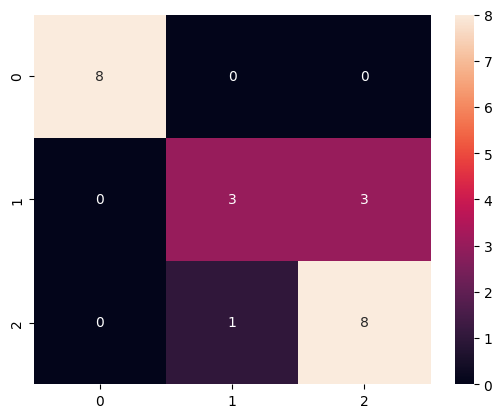

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(metrics.accuracy_score(y_test, y_pred))
    metrics_f1.append(metrics.f1_score(y_test, y_pred, average='macro'))

In [ ]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


In [ ]:
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


In [ ]:
loo = LeaveOneOut()
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# 1. Изучите разбиение Leave-P-Out. Продемонстрируйте работу этого алгоритма на примере из лабораторной работы.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from itertools import combinations
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Инициализация разбиения Leave-P-Out для 1 элемента (P=1)
lpo = LeavePOut(p=1)

# Создаем модель логистической регрессии
model = LogisticRegression()

# Для хранения результатов точности модели
accuracies = []

# Цикл для прогона каждого разбиения LPO
for train_index, test_index in lpo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовом наборе
    y_pred = model.predict(X_test)

    # Рассчет точности (accuracy) модели на тестовом наборе
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
mean_accuracy = np.mean(accuracies)
print(f"Средняя точность модели: {mean_accuracy}")

Средняя точность модели: 0.9666666666666667


In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X_,                      # матрица признаков
                             y_,                      # вектор цели
                             cv = lpo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

KeyboardInterrupt: 

# 2. Изучите функцию cross_validate(). Продемонстрируйте работу этой функции на тех же данных.

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y, cv=5)
print(cv_results['test_score'])

[1.         0.96666667 0.93333333 0.9        1.        ]


# 3. Оцените при помощи кросс-валидации другие метрики эффективности для этой же модели.

In [ ]:
cv_results = cross_validate(model, X, y,cv=5, scoring=('r2', 'neg_mean_squared_error'))
print(cv_results['fit_time'])
print(cv_results['test_neg_mean_squared_error'])
print(cv_results['test_r2'])

[0.00390553 0.00165725 0.01282382 0.01495886 0.0140717 ]
[-0.         -0.03333333 -0.06666667 -0.1        -0.        ]
[1.   0.95 0.9  0.85 1.  ]


# 4. Сравните кросс-валидированные результаты работы нескольких моделей на одних и тех же данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
# Инициализация моделей
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]

# Кросс-валидация и сравнение результатов
results = []
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results.append(scores)


results_df = pd.DataFrame(results, index=['Logistic Regression', 'KNN', 'Decision Tree', 'SVC']).T


print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Logistic Regression       KNN  Decision Tree       SVC
0             0.966667  0.966667       0.966667  0.966667
1             1.000000  1.000000       0.966667  0.966667
2             0.933333  0.933333       0.900000  0.966667
3             0.966667  0.966667       1.000000  0.933333
4             1.000000  1.000000       1.000000  1.000000


# 5. Повторите анализ на другом датасете: встроенном наборе данных о диабете.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Сравнение кросс-валидированных результатов
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'{model_name}: {np.mean(scores)}')

Linear Regression: 0.48231643590864215
Random Forest: 0.42680549399598355
Support Vector Machine: 0.14680869160894452


# 6. Сделайте k-блочную перекрёстную проверку (KFold) модели логистической регрессии, предварительно стандартизировав данные. Для этого создайте конвейер с помощью make_pipeline из библиотеки sklearn.pipeline, который будет стандартизировать, а затем выполнять логистическую регрессию.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

# Загрузка датасета diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Создание конвейера для стандартизации и логистической регрессии
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# KFold с 5 блоками
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение к-блочной перекрёстной проверки
scores = cross_val_score(pipeline, X, y, cv=kfold)

# Вывод результатов перекрёстной проверки
print('Средняя оценка перекрёстной проверки:', scores.mean())

Средняя оценка перекрёстной проверки: 0.002247191011235955
